# Overview:
---
### - Importing Libraries
### - Importing Dataset
### - Encode the Labeled Data
### - Split the Data Into Train and Test
### - Data Augmentation

---

## Importing Libraries

In [28]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import random 

---
## Importing the Dataset

In [30]:
os.getcwd()

'C:\\Users\\emyyu\\OneDrive\\Documents\\DEPI\\ArSL'

In [32]:
data_path = 'RGB ArSL dataset'

In [34]:
categories = os.listdir(data_path)
len(categories)

31

In [36]:
img_size = 224

---
## Encode the Labeled Data

In [ ]:

categories = os.listdir(data_path)
data = []
labels = []
for category in categories:
    path = os.path.join(data_path, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            if img_array is not None:
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img_array = cv2.resize(img_array, (img_size, img_size))
                data.append(img_array)
                labels.append(class_num)  # Add the category (label) to the labels list
        except Exception as e:
            print(f"Error loading image {img}: {e}")

# Check the data length
print(f"Loaded {len(data)} images.")


# Perform label encoding
label_encoder = LabelEncoder()  # Initialize the LabelEncoder
encoded_labels = label_encoder.fit_transform(labels)  # Encode the string labels into numerical labels

# Optionally, convert the encoded labels to one-hot encoding
one_hot_labels = to_categorical(encoded_labels)  # Convert to one-hot encoding

Loaded 7856 images.


C:\Users\emyyu\AppData\Local\Temp\ipykernel_18228\3423627340.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


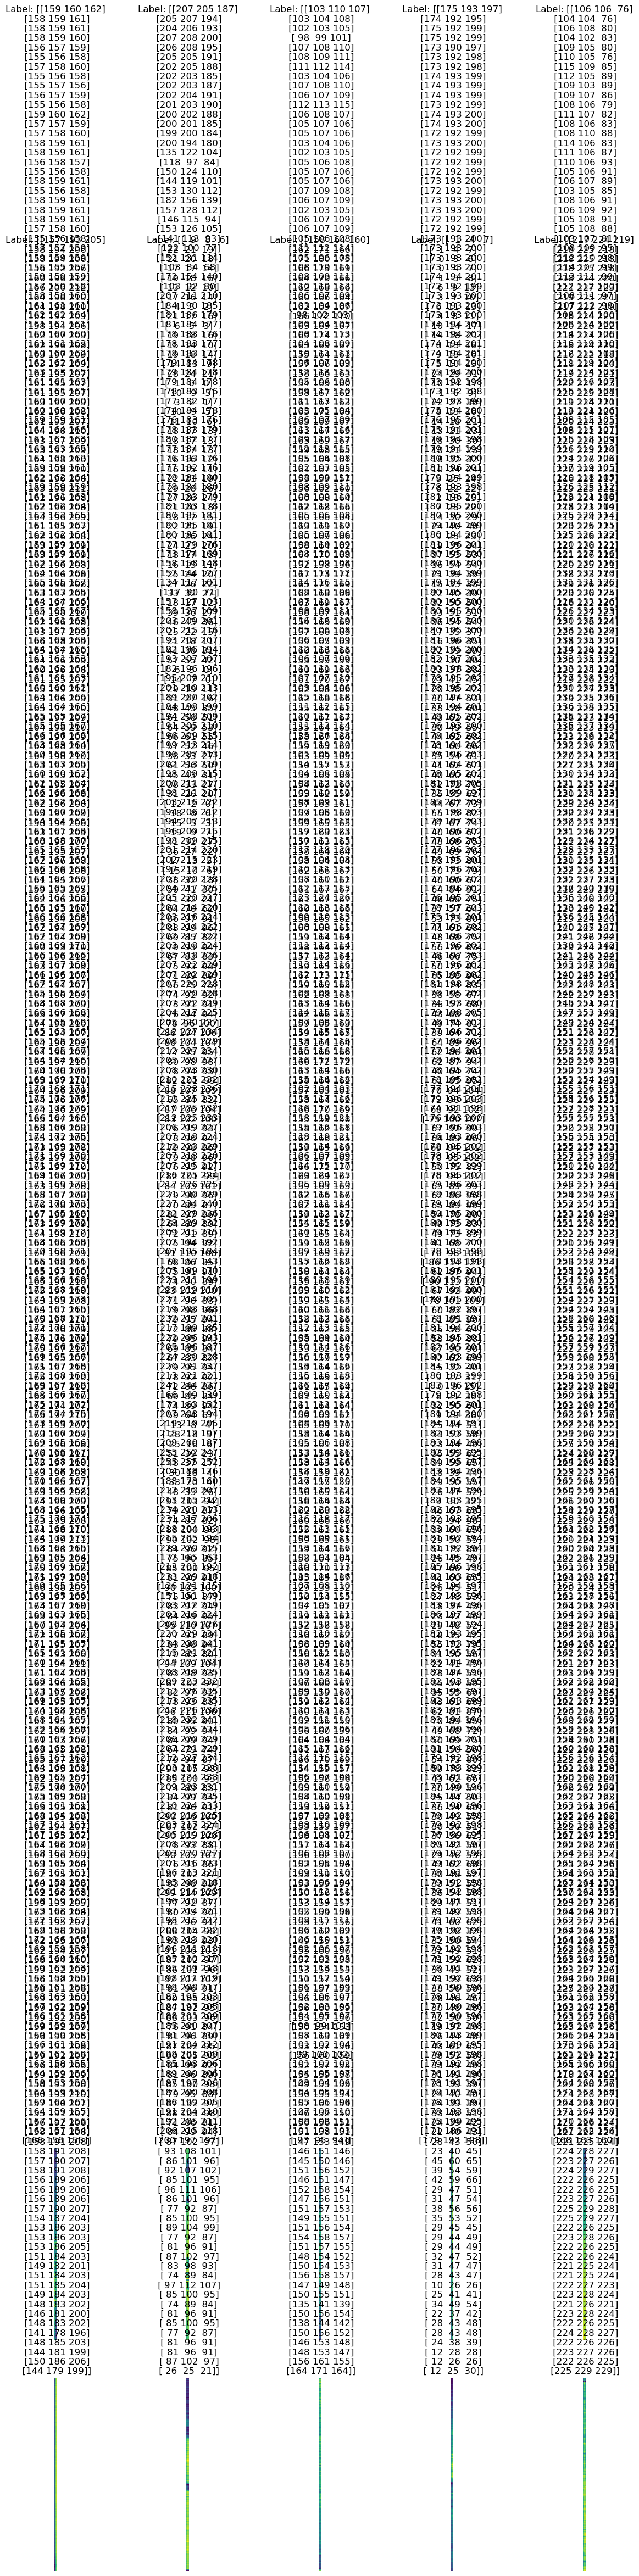

In [40]:
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(data[i][0])  # Assuming data[i][0] contains the image array
    plt.title(f"Label: {data[i][1]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

---
## Split the Data Into Train and Test

In [42]:
categorical_labels =to_categorical(encoded_labels,num_classes=31) 
# Shuffle the dataset

# Combine images and labels as pairs
combined = list(zip(data, categorical_labels))
# Shuffle the combined pairs
random.shuffle(combined)
# Unzip back into data and labels after shuffling
data, categorical_labels = zip(*combined)

x_train, x_test, y_train, y_test = train_test_split(data, categorical_labels, test_size=0.2)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5)
x_train = np.array(x_train)
x_test = np.array(x_test)
x_val = np.array(x_val)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)
print(f'X_train shape is {x_train.shape}')
print(f'X_val shape is {x_val.shape}')
print(f'X_test shape is {x_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_val shape is {y_val.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (6284, 224, 224, 3)
X_val shape is (786, 224, 224, 3)
X_test shape is (786, 224, 224, 3)
y_train shape is (6284, 31)
y_val shape is (786, 31)
y_test shape is (786, 31)


In [44]:
x_train = np.array(x_train).reshape(-1, img_size, img_size, 3)
x_test = np.array(x_test).reshape(-1, img_size, img_size, 3)
x_val = np.array(x_val).reshape(-1, img_size, img_size, 3)

In [46]:
y_train=np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [48]:
print(f'X_train shape is {x_train.shape}')
print(f'X_val shape is {x_val.shape}')
print(f'X_test shape is {x_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_val shape is {y_val.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (6284, 224, 224, 3)
X_val shape is (786, 224, 224, 3)
X_test shape is (786, 224, 224, 3)
y_train shape is (6284, 31)
y_val shape is (786, 31)
y_test shape is (786, 31)


---
## Data Augmentation

In [50]:
# Importing data augmentaion class to apply rescale /255 , rotation , shear , zoom , horizontal
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255.,
                              rotation_range=20,       # Randomly rotate images by 20 degrees
                              width_shift_range=0.2,   # Shift images horizontally by 20% of width
                              height_shift_range=0.2,  # Shift images vertically by 20% of height
                              zoom_range=0.2,          # Randomly zoom in by 20%
                              horizontal_flip=True,    # Randomly flip images horizontally
                              fill_mode='nearest')      # Fill in pixels when shifting/rotating

In [52]:
# applying data augmentation on training data only
datagen.fit(x_train)
augmented_data_generator = datagen.flow(x_train, y_train, batch_size=32)